# Description

The data analysis path I will follow is:

- Data extraction
- Data cleaning 
- Exploratory Data Analysis :

   **(i)Correlations**
   
   **(ii)Plot the production data before features engineering**
   
   **(iii)Map the cleaned Data and visually examine and explore**

                

# DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

In [2]:
data = pd.read_excel("data/Volve dataset.xlsx")
data.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [3]:
data.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
std,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
DATEPRD                     15634 non-null datetime64[ns]
WELL_BORE_CODE              15634 non-null object
NPD_WELL_BORE_CODE          15634 non-null int64
NPD_WELL_BORE_NAME          15634 non-null object
NPD_FIELD_CODE              15634 non-null int64
NPD_FIELD_NAME              15634 non-null object
NPD_FACILITY_CODE           15634 non-null int64
NPD_FACILITY_NAME           15634 non-null object
ON_STREAM_HRS               15349 non-null float64
AVG_DOWNHOLE_PRESSURE       8980 non-null float64
AVG_DOWNHOLE_TEMPERATURE    8980 non-null float64
AVG_DP_TUBING               8980 non-null float64
AVG_ANNULUS_PRESS           7890 non-null float64
AVG_CHOKE_SIZE_P            8919 non-null float64
AVG_CHOKE_UOM               9161 non-null object
AVG_WHP_P                   9155 non-null float64
AVG_WHT_P                   9146 non-null float64
DP_CHOKE_SIZE               15340 no

# Data Extraction

**Dropping Columns**

In [5]:
data.dtypes
data.dtypes.value_counts()

float64           13
object             7
int64              3
datetime64[ns]     1
dtype: int64

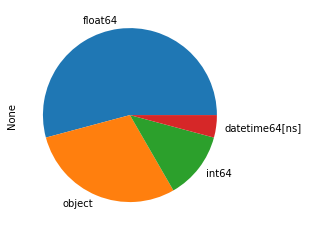

In [6]:
data.dtypes.value_counts().plot.pie()

In [7]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

WELL_BORE_CODE------------------------------------ ['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']
NPD_WELL_BORE_NAME-------------------------------- ['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']
NPD_FIELD_NAME------------------------------------ ['VOLVE']
NPD_FACILITY_NAME--------------------------------- ['MÆRSK INSPIRER']
AVG_CHOKE_UOM------------------------------------- ['%' nan]
FLOW_KIND----------------------------------------- ['production' 'injection']
WELL_TYPE----------------------------------------- ['WI' 'OP']


**Injectors Wells**

In [8]:
data.groupby(["NPD_WELL_BORE_NAME", "WELL_TYPE"]).count()

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE  \
NPD_WELL_BORE_NAME WELL_TYPE                                                
15/9-F-1 C         OP             744             744                 744   
                   WI               2               2                   2   
15/9-F-11          OP            1165            1165                1165   
15/9-F-12          OP            3056            3056                3056   
15/9-F-14          OP            3056            3056                3056   
15/9-F-15 D        OP             978             978                 978   
15/9-F-4           WI            3327            3327                3327   
15/9-F-5           OP             144             144                 144   
                   WI            3162            3162                3162   

                              NPD_FIELD_CODE  NPD_FIELD_NAME  \
NPD_WELL_BORE_NAME WELL_TYPE                                   
15/9-F-1 C         OP                    744             744   
                   WI                      2               2   
15/9-F-11          OP                   1165            1165   
15/9-F-12          OP                   3056            3056   
15/9-F-14          OP                   3056            3056   
15/9-F-15 D        OP                    978             978   
15/9-F-4           WI                   3327            3327   
15/9-F-5           OP                    144             144   
                   WI                   3162            3162   

                              NPD_FACILITY_CODE  NPD_FACILITY_NAME  \
NPD_WELL_BORE_NAME WELL_TYPE                                         
15/9-F-1 C         OP                       744                744   
                   WI                         2                  2   
15/9-F-11          OP                      1165               1165   
15/9-F-12          OP                      3056               3056   
15/9-F-14          OP                      3056               3056   
15/9-F-15 D        OP                       978                978   
15/9-F-4           WI                      3327               3327   
15/9-F-5           OP                       144                144   
                   WI                      3162               3162   

                              ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
NPD_WELL_BORE_NAME WELL_TYPE                                         
15/9-F-1 C         OP                   744                    741   
                   WI                     2                      2   
15/9-F-11          OP                  1165                   1159   
15/9-F-12          OP                  3056                   3050   
15/9-F-14          OP                  3056                   3050   
15/9-F-15 D        OP                   978                    978   
15/9-F-4           WI                  3175                      0   
15/9-F-5           OP                   144                      0   
                   WI                  3029                      0   

                              AVG_DOWNHOLE_TEMPERATURE  ...  AVG_CHOKE_SIZE_P  \
NPD_WELL_BORE_NAME WELL_TYPE                            ...                     
15/9-F-1 C         OP                              741  ...               744   
                   WI                                2  ...                 2   
15/9-F-11          OP                             1159  ...              1163   
15/9-F-12          OP                             3050  ...              3012   
15/9-F-14          OP                             3050  ...              2860   
15/9-F-15 D        OP                              978  ...               978   
15/9-F-4           WI                                0  ...                 0   
15/9-F-5           OP                                0  ...               144   
                   WI                                0  ...                16   

                              AVG_CHOKE_UOM

In [9]:
data['NPD_WELL_BORE_CODE'].value_counts()

5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64

In [10]:
F1 = data[data["NPD_WELL_BORE_CODE"] == 7405]
F1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 745
Data columns (total 24 columns):
DATEPRD                     746 non-null datetime64[ns]
WELL_BORE_CODE              746 non-null object
NPD_WELL_BORE_CODE          746 non-null int64
NPD_WELL_BORE_NAME          746 non-null object
NPD_FIELD_CODE              746 non-null int64
NPD_FIELD_NAME              746 non-null object
NPD_FACILITY_CODE           746 non-null int64
NPD_FACILITY_NAME           746 non-null object
ON_STREAM_HRS               746 non-null float64
AVG_DOWNHOLE_PRESSURE       743 non-null float64
AVG_DOWNHOLE_TEMPERATURE    743 non-null float64
AVG_DP_TUBING               743 non-null float64
AVG_ANNULUS_PRESS           17 non-null float64
AVG_CHOKE_SIZE_P            746 non-null float64
AVG_CHOKE_UOM               746 non-null object
AVG_WHP_P                   746 non-null float64
AVG_WHT_P                   746 non-null float64
DP_CHOKE_SIZE               746 non-null float64
BORE_OIL_VOL      

In [11]:
F1.isna().sum()
percent = (F1.isna().sum()/F1.isna().count()).sort_values(ascending = True)
percent

DATEPRD                     0.000000
BORE_WAT_VOL                0.000000
BORE_GAS_VOL                0.000000
BORE_OIL_VOL                0.000000
DP_CHOKE_SIZE               0.000000
AVG_WHT_P                   0.000000
AVG_WHP_P                   0.000000
AVG_CHOKE_UOM               0.000000
AVG_CHOKE_SIZE_P            0.000000
FLOW_KIND                   0.000000
WELL_TYPE                   0.000000
ON_STREAM_HRS               0.000000
NPD_FACILITY_NAME           0.000000
NPD_FACILITY_CODE           0.000000
NPD_FIELD_NAME              0.000000
NPD_FIELD_CODE              0.000000
NPD_WELL_BORE_NAME          0.000000
NPD_WELL_BORE_CODE          0.000000
WELL_BORE_CODE              0.000000
AVG_DOWNHOLE_PRESSURE       0.004021
AVG_DOWNHOLE_TEMPERATURE    0.004021
AVG_DP_TUBING               0.004021
AVG_ANNULUS_PRESS           0.977212
BORE_WI_VOL                 1.000000
dtype: float64

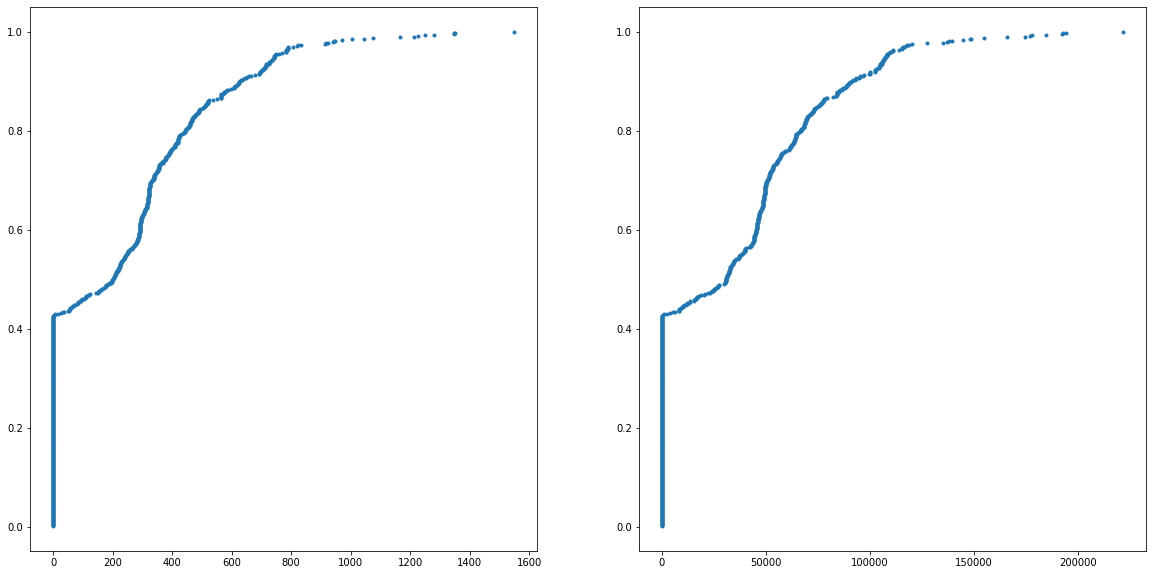

In [12]:
def eced(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y


well_F1 = data['NPD_WELL_BORE_CODE'] == 7405
df_well_F1 = data[well_F1]

x_axis, y_axis = eced(df_well_F1['BORE_OIL_VOL'])
x_axis_, y_axis_ = eced(df_well_F1['BORE_GAS_VOL'])

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.plot(x_axis, y_axis, marker=".", linestyle="none")
plt.subplot(122)
plt.plot(x_axis_, y_axis_, marker=".", linestyle="none")

In [13]:
F5 = data[data["NPD_WELL_BORE_CODE"] == 5769]
F5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 12328 to 15633
Data columns (total 24 columns):
DATEPRD                     3306 non-null datetime64[ns]
WELL_BORE_CODE              3306 non-null object
NPD_WELL_BORE_CODE          3306 non-null int64
NPD_WELL_BORE_NAME          3306 non-null object
NPD_FIELD_CODE              3306 non-null int64
NPD_FIELD_NAME              3306 non-null object
NPD_FACILITY_CODE           3306 non-null int64
NPD_FACILITY_NAME           3306 non-null object
ON_STREAM_HRS               3173 non-null float64
AVG_DOWNHOLE_PRESSURE       0 non-null float64
AVG_DOWNHOLE_TEMPERATURE    0 non-null float64
AVG_DP_TUBING               0 non-null float64
AVG_ANNULUS_PRESS           160 non-null float64
AVG_CHOKE_SIZE_P            160 non-null float64
AVG_CHOKE_UOM               160 non-null object
AVG_WHP_P                   160 non-null float64
AVG_WHT_P                   151 non-null float64
DP_CHOKE_SIZE               3172 non-null float64
BORE_O

In [14]:
F5.isna().sum()
percent = (F5.isna().sum()/F5.isna().count()).sort_values(ascending = True)
percent

DATEPRD                     0.000000
FLOW_KIND                   0.000000
NPD_FACILITY_NAME           0.000000
NPD_FACILITY_CODE           0.000000
NPD_FIELD_NAME              0.000000
WELL_TYPE                   0.000000
NPD_WELL_BORE_NAME          0.000000
NPD_WELL_BORE_CODE          0.000000
WELL_BORE_CODE              0.000000
NPD_FIELD_CODE              0.000000
ON_STREAM_HRS               0.040230
DP_CHOKE_SIZE               0.040532
BORE_WI_VOL                 0.178463
BORE_WAT_VOL                0.951603
BORE_GAS_VOL                0.951603
BORE_OIL_VOL                0.951603
AVG_CHOKE_UOM               0.951603
AVG_WHP_P                   0.951603
AVG_CHOKE_SIZE_P            0.951603
AVG_ANNULUS_PRESS           0.951603
AVG_WHT_P                   0.954325
AVG_DOWNHOLE_TEMPERATURE    1.000000
AVG_DOWNHOLE_PRESSURE       1.000000
AVG_DP_TUBING               1.000000
dtype: float64

**Missing Data**

In [15]:
data.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

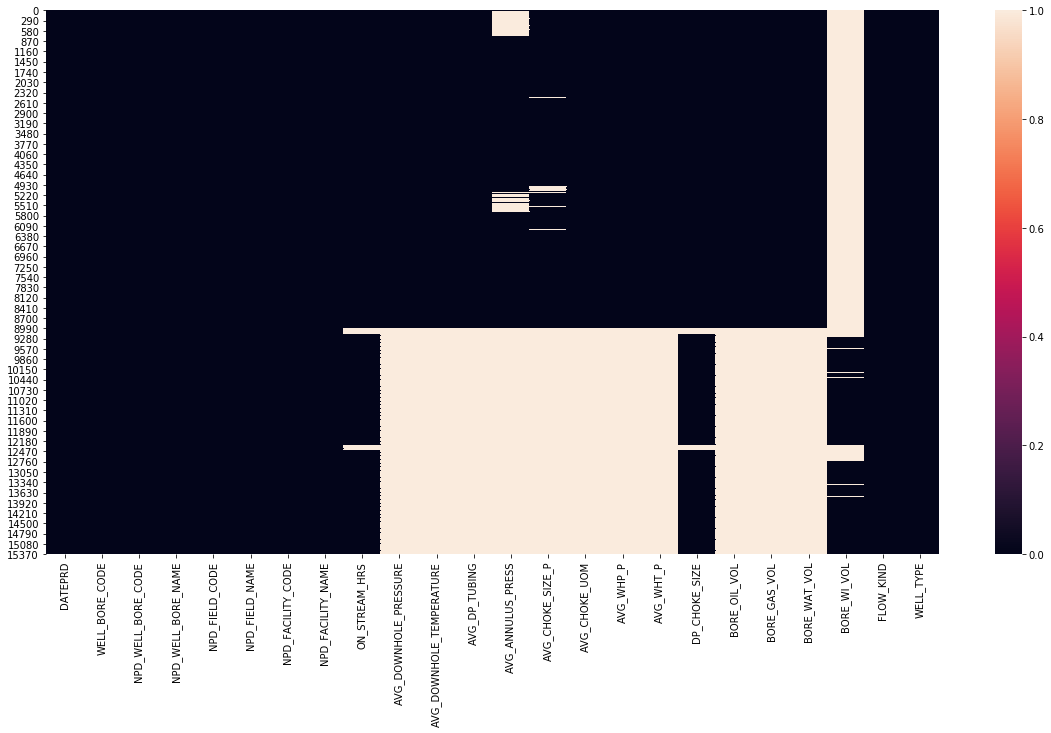

In [16]:
plt.figure(figsize = (20,10))
sns.heatmap(data.isna(), cbar = True)

In [17]:
all_data_na = (data.isna().sum() / len(data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)

In [18]:
total = data.isna().sum().sort_values(ascending = True)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
missing_data

,Total,Percent
DATEPRD,0,0.000000
FLOW_KIND,0,0.000000
NPD_FACILITY_NAME,0,0.000000
NPD_FACILITY_CODE,0,0.000000
NPD_FIELD_NAME,0,0.000000
WELL_TYPE,0,0.000000
NPD_WELL_BORE_NAME,0,0.000000
NPD_WELL_BORE_CODE,0,0.000000
WELL_BORE_CODE,0,0.000000
NPD_FIELD_CODE,0,0.000000


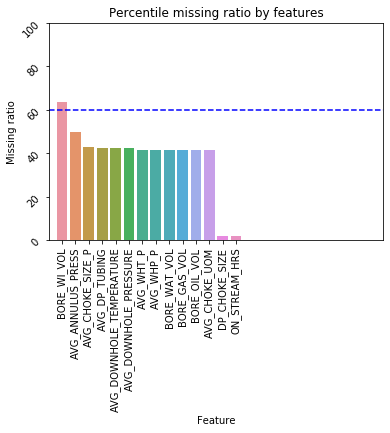

In [19]:
import seaborn as sns
f, ax = plt.subplots()
missing_data_threshold = 60
plt.axhline(y=missing_data_threshold, color='blue', linestyle='--',label="missing percentage threshold")
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel("Feature", fontsize = 10)
plt.ylabel("Missing ratio", fontsize = 10)
plt.title("Percentile missing ratio by features")
plt.xlim(-1, len(percent))
plt.ylim(0,100)
plt.yticks(rotation = '45')
plt.show()

In [20]:
missing_rate = data.isna().sum()/data.shape[0]

type_to_clean = data.columns[(missing_rate>0.6)]
type_to_clean

Index(['BORE_WI_VOL'], dtype='object')

# Data Cleaning 

In [21]:
data = pd.DataFrame(data)

supp_F4 = data.loc[data['NPD_WELL_BORE_CODE']== 5693].index
data.drop(supp_F4, inplace = True)
supp_F5 = data.loc[data['NPD_WELL_BORE_CODE']== 5769].index
data.drop(supp_F5, inplace = True)

In [22]:
df = data.filter(['DATEPRD', 'NPD_WELL_BORE_NAME','ON_STREAM_HRS' ,'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
          'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P', 'DP_CHOKE_SIZE',
          'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9001 entries, 0 to 9000
Data columns (total 13 columns):
DATEPRD                     9001 non-null datetime64[ns]
NPD_WELL_BORE_NAME          9001 non-null object
ON_STREAM_HRS               9001 non-null float64
AVG_DOWNHOLE_PRESSURE       8980 non-null float64
AVG_DOWNHOLE_TEMPERATURE    8980 non-null float64
AVG_DP_TUBING               8980 non-null float64
AVG_CHOKE_SIZE_P            8759 non-null float64
AVG_WHP_P                   8995 non-null float64
AVG_WHT_P                   8995 non-null float64
DP_CHOKE_SIZE               8995 non-null float64
BORE_OIL_VOL                9001 non-null float64
BORE_GAS_VOL                9001 non-null float64
BORE_WAT_VOL                9001 non-null float64
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 984.5+ KB


In [24]:
# Dropping all nan values of targets 
#df =df.dropna(subset =["BORE_OIL_VOL"])
#df =df.dropna(subset =["BORE_GAS_VOL"])

In [25]:
# Filtering out values of target variable that has zero values (shut-in)
df =df[(df['BORE_OIL_VOL'] !=0)]
df =df[(df['BORE_GAS_VOL'] !=0)]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7879 entries, 15 to 8927
Data columns (total 13 columns):
DATEPRD                     7879 non-null datetime64[ns]
NPD_WELL_BORE_NAME          7879 non-null object
ON_STREAM_HRS               7879 non-null float64
AVG_DOWNHOLE_PRESSURE       7864 non-null float64
AVG_DOWNHOLE_TEMPERATURE    7864 non-null float64
AVG_DP_TUBING               7864 non-null float64
AVG_CHOKE_SIZE_P            7879 non-null float64
AVG_WHP_P                   7876 non-null float64
AVG_WHT_P                   7876 non-null float64
DP_CHOKE_SIZE               7876 non-null float64
BORE_OIL_VOL                7879 non-null float64
BORE_GAS_VOL                7879 non-null float64
BORE_WAT_VOL                7879 non-null float64
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 861.8+ KB


In [27]:
df = df.reset_index()

In [28]:
total = df.isna().sum().sort_values(ascending = True)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending = True)
missing_data = pd.concat([total], axis = 1, keys = ["Total ","Percent"])
missing_data

,Total
index,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_CHOKE_SIZE_P,0
BORE_OIL_VOL,0
BORE_GAS_VOL,0
BORE_WAT_VOL,0
AVG_WHP_P,3
AVG_WHT_P,3


In [29]:
# We must impute this nan values in data pre-processing

In [30]:
df.to_csv('data/cleaned_data.csv')

# Exploratory Data Analysis

Check for Multicollinearity between the features, high inter-correlations or inter-associations among the independent features, if present weakens the statistical power.


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


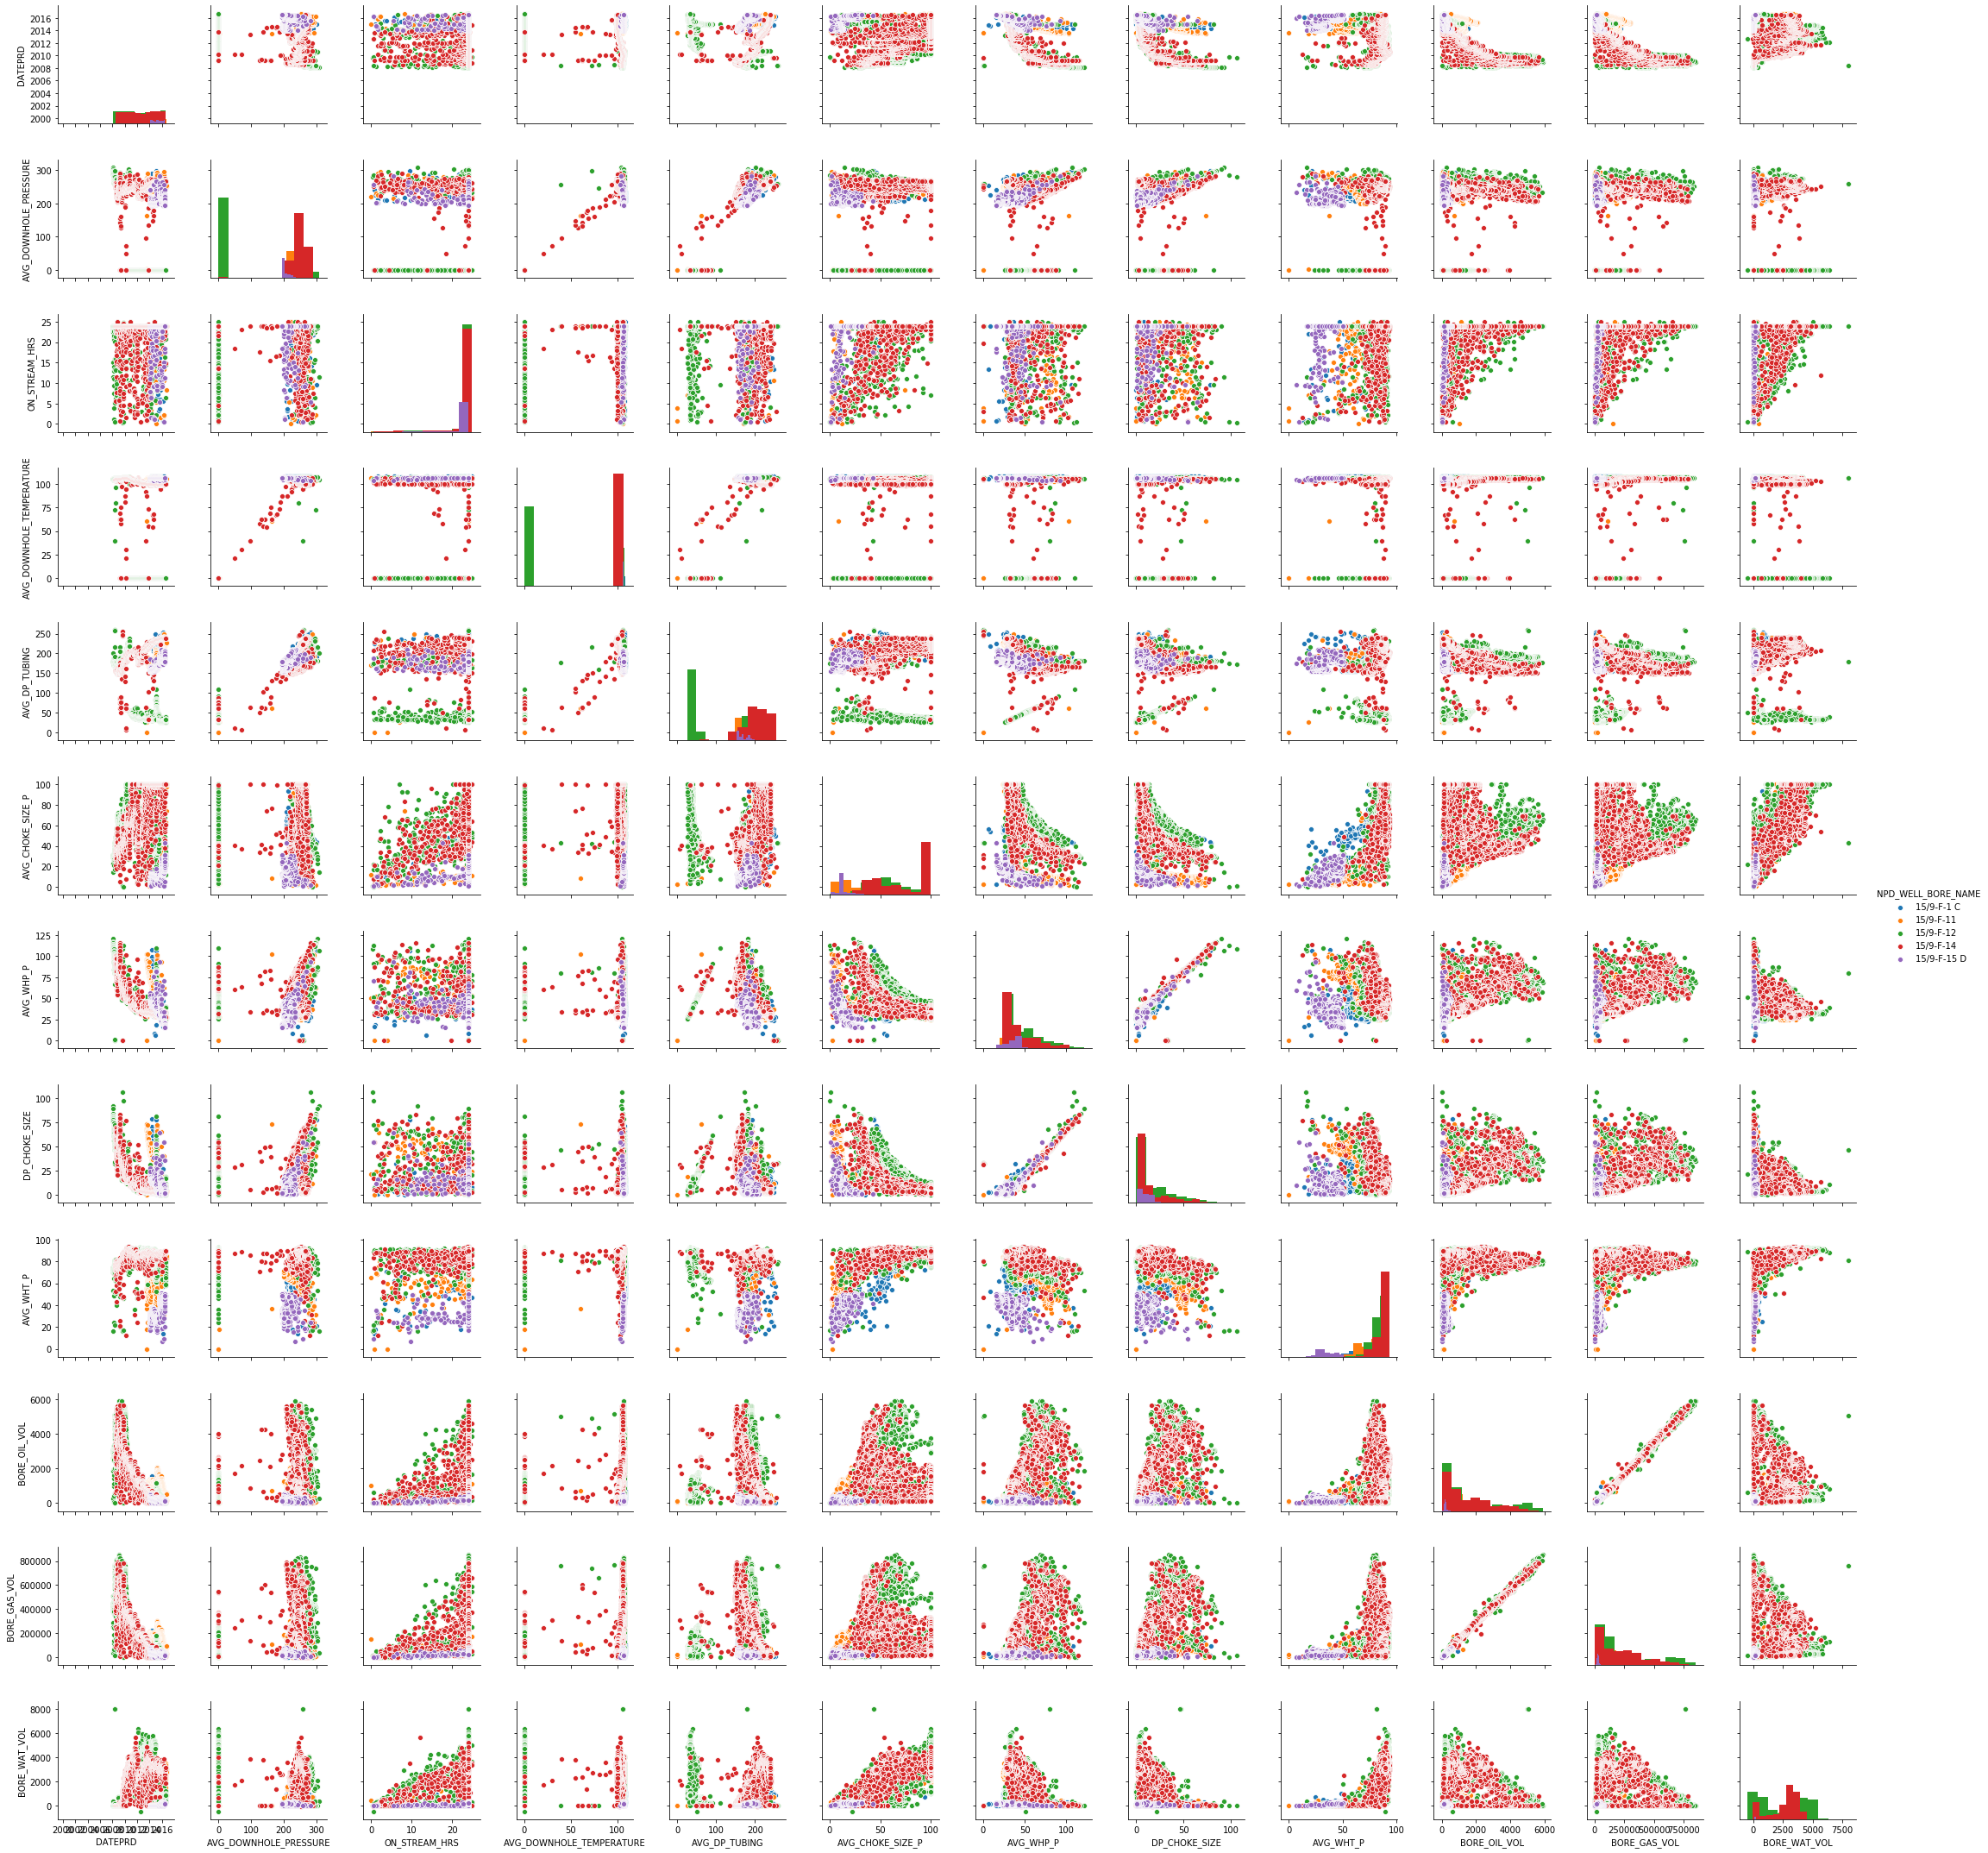

In [31]:
#make pairplots

sns_plot1=sns.pairplot(df, vars = ['DATEPRD', 'AVG_DOWNHOLE_PRESSURE','ON_STREAM_HRS' ,'AVG_DOWNHOLE_TEMPERATURE',
          'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'DP_CHOKE_SIZE','AVG_WHT_P',
          'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL'],diag_kind="hist", hue="NPD_WELL_BORE_NAME")

In [32]:
sns_plot1.savefig("wells_pairwise.png")

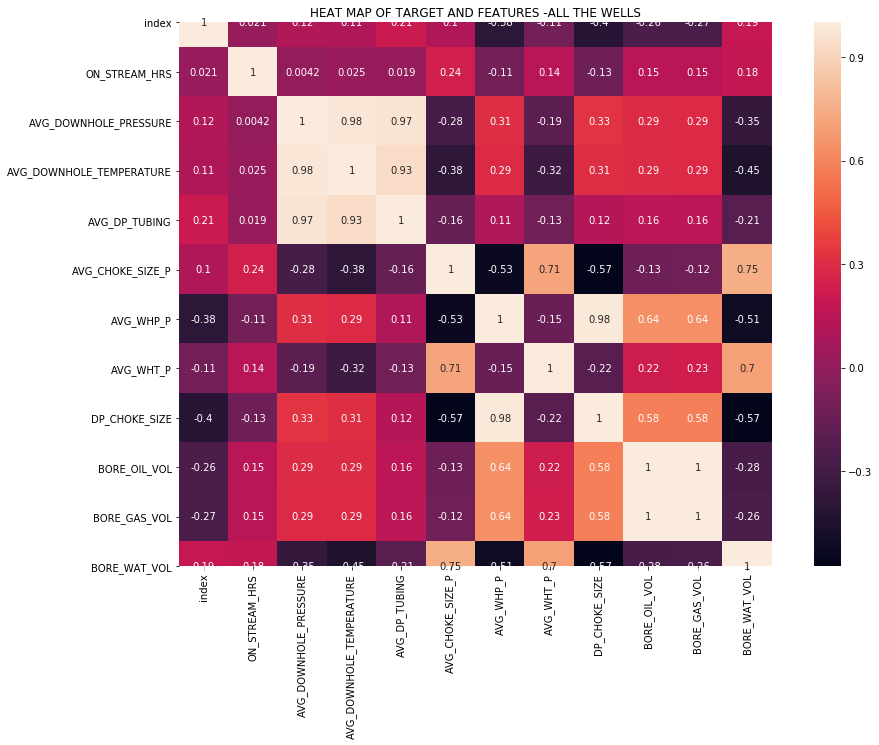

In [33]:
import seaborn as sns
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = plt.title('HEAT MAP OF TARGET AND FEATURES -ALL THE WELLS')   
sns.heatmap(corr_mat, square = True, annot = True)

#sns.heatmap(df.corr(), annot=True,fmt = '.1g', cmap= 'GnBu',linewidths=2,vmin=-1, vmax=1, center= 0)
#plt.title('HEAT MAP OF TARGET AND FEATURES -ALL THE WELLS')   
#plt.show()

Text(0.5, 0, 'DP_CHOKE_SIZE')

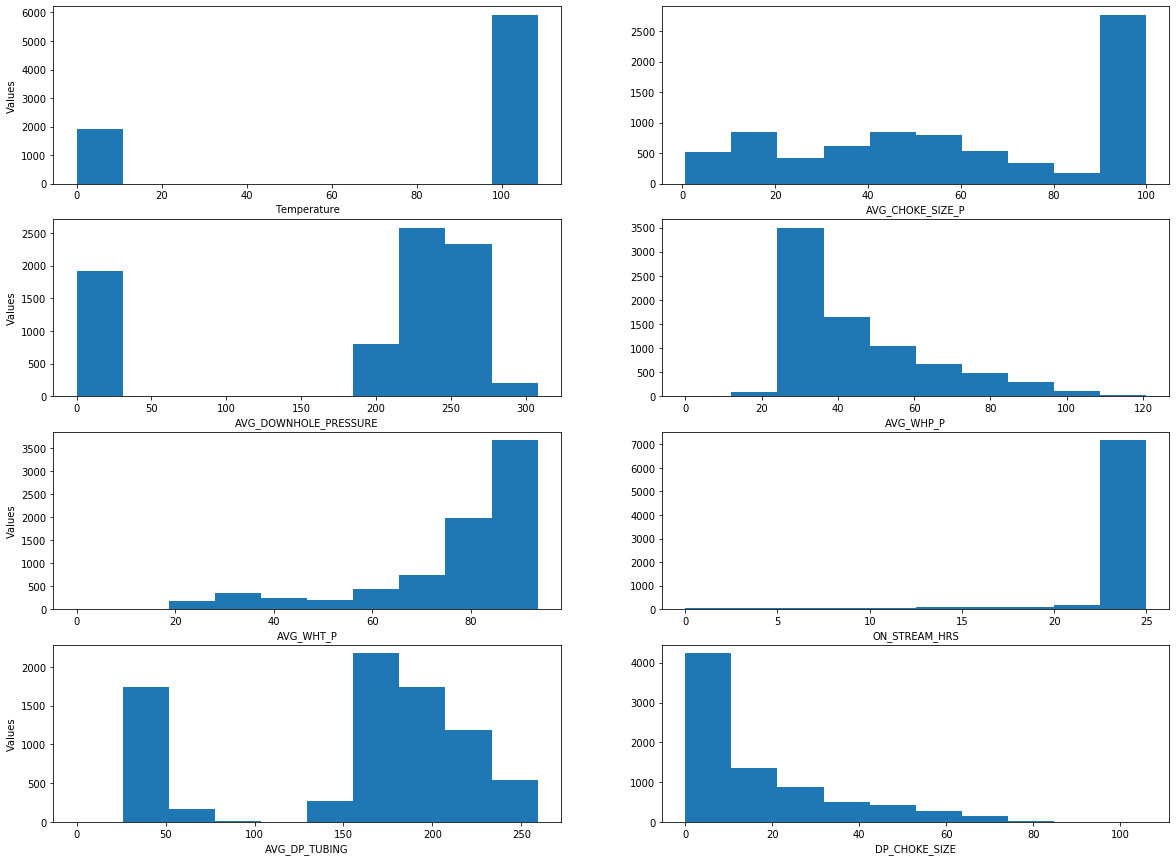

In [34]:
# Histogramme de variables continues
f, ax = plt.subplots(4,2, figsize = (20,15))

ax[0,0].hist(df['AVG_DOWNHOLE_TEMPERATURE'])
ax[0,0].set_xlabel("Temperature")
ax[0,0].set_ylabel("Values")
ax[0,1].hist(df['AVG_CHOKE_SIZE_P'])
ax[0,1].set_xlabel("AVG_CHOKE_SIZE_P")

ax[1,0].hist(df['AVG_DOWNHOLE_PRESSURE'])
ax[1,0].set_xlabel("AVG_DOWNHOLE_PRESSURE")
ax[1,0].set_ylabel("Values")
ax[1,1].hist(df['AVG_WHP_P'])
ax[1,1].set_xlabel("AVG_WHP_P")

ax[2,0].hist(df['AVG_WHT_P'])
ax[2,0].set_xlabel("AVG_WHT_P")
ax[2,0].set_ylabel("Values")
ax[2,1].hist(df['ON_STREAM_HRS'])
ax[2,1].set_xlabel("ON_STREAM_HRS")

ax[3,0].hist(df['AVG_DP_TUBING'])
ax[3,0].set_ylabel("Values")
ax[3,0].set_xlabel("AVG_DP_TUBING")
ax[3,1].hist(df['DP_CHOKE_SIZE'])
ax[3,1].set_xlabel("DP_CHOKE_SIZE")

(Average Well head pressure and DP Choke size) & () & () are perfectly correlated.

Oil vol and Gas Vol are perfectly correlated.


Target Variable : BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL

Features (independent varaibles): AVG_ANNULUS_PRESS , AVG_CHOKE_SIZE_P, AVG_WHP_P, AVG_WHT_P, ON_STREAM_HRS, AVG_DP_TUBING AVG_DOWNHOLE_PRESSURE, AVG_DOWNHOLE_TEMPERATURE

## Boxplots of features for each wellbore

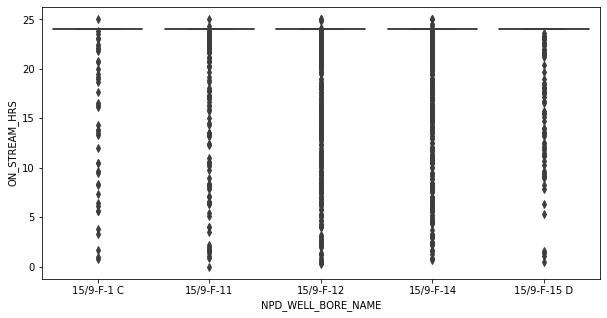

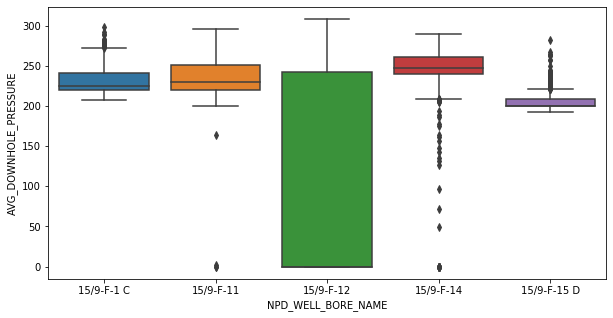

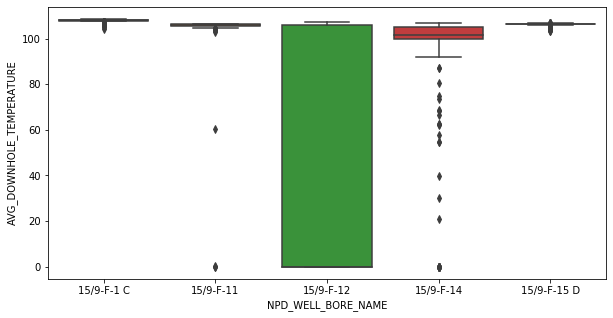

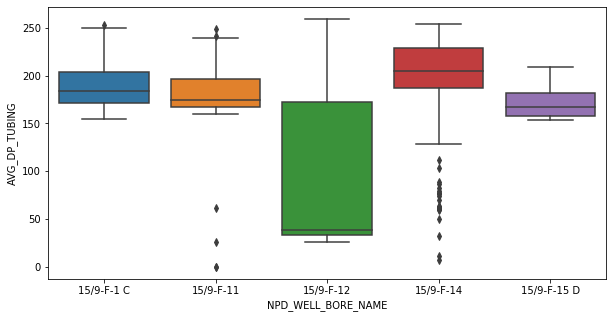

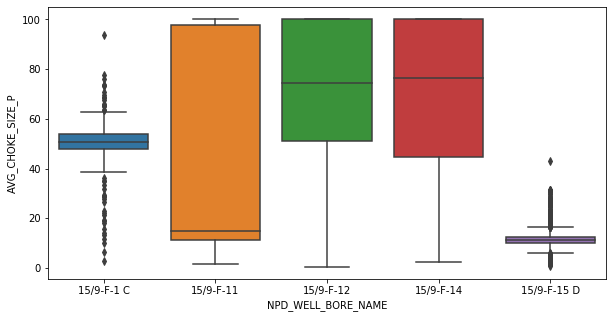

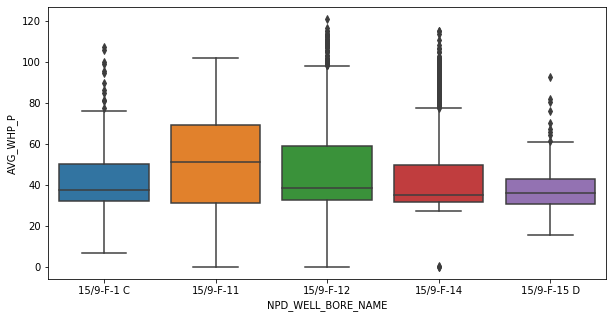

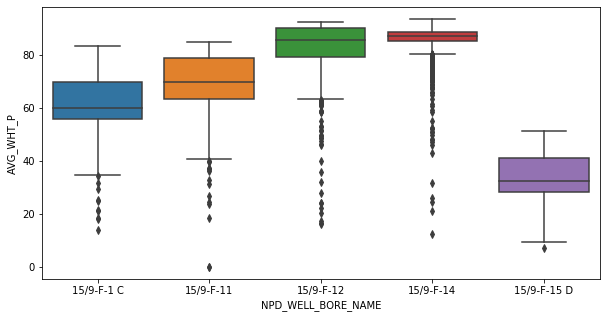

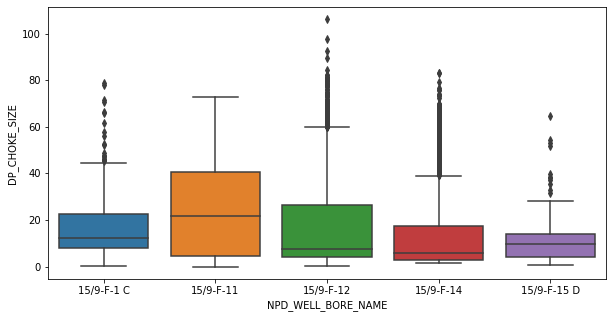

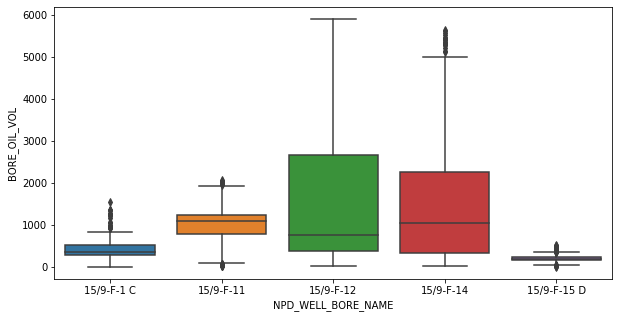

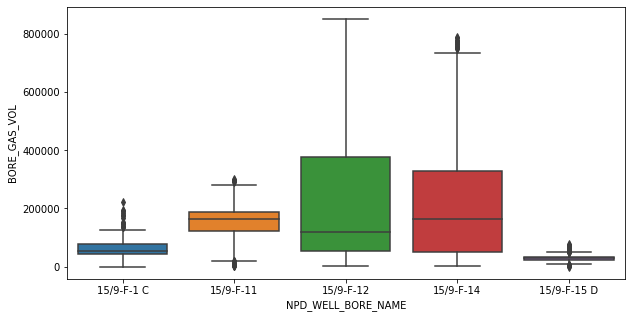

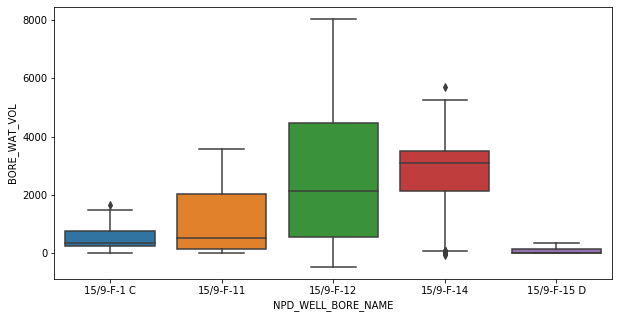

In [35]:
DATASET = pd.read_excel("data/Volve dataset.xlsx")

figuresizes = (10,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'ON_STREAM_HRS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_DOWNHOLE_PRESSURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_DOWNHOLE_TEMPERATURE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_DP_TUBING', data=df)

#plt.figure(figsize=figuresizes)
#sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_ANNULUS_PRESS', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_CHOKE_SIZE_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_WHP_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'AVG_WHT_P', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'DP_CHOKE_SIZE', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'BORE_OIL_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'BORE_GAS_VOL', data=df)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_NAME', y = 'BORE_WAT_VOL', data=df)



From the box plot it is clear that the data is highly skewed and depends on well so while dealing with the null values we cannot use the mean method.

## Visualisation targets before features engineering


In [36]:
Well_F1 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-1 C']
#Well_F4 = data[data['NPD_WELL_BORE_NAME'] == '15/9-F-4']
#Well_F5 = data[data['NPD_WELL_BORE_NAME'] == '15/9-F-5']
Well_F11 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-11']
Well_F12 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-12']
Well_F14 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-14']
Well_F15 = df[df['NPD_WELL_BORE_NAME'] == '15/9-F-15 D']

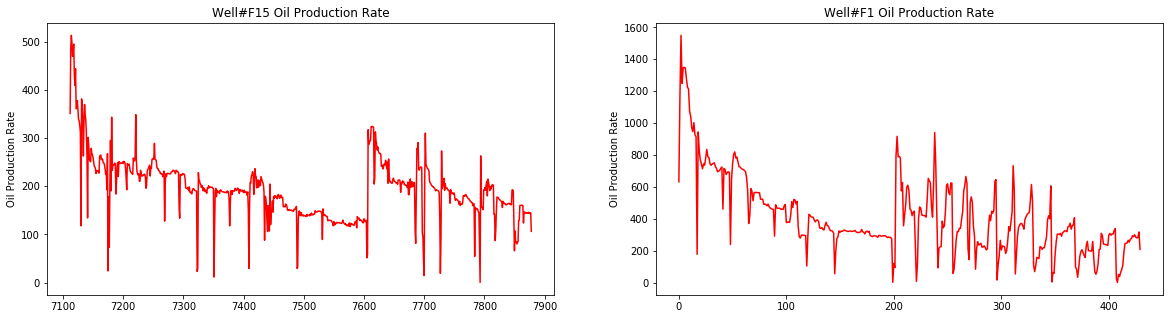

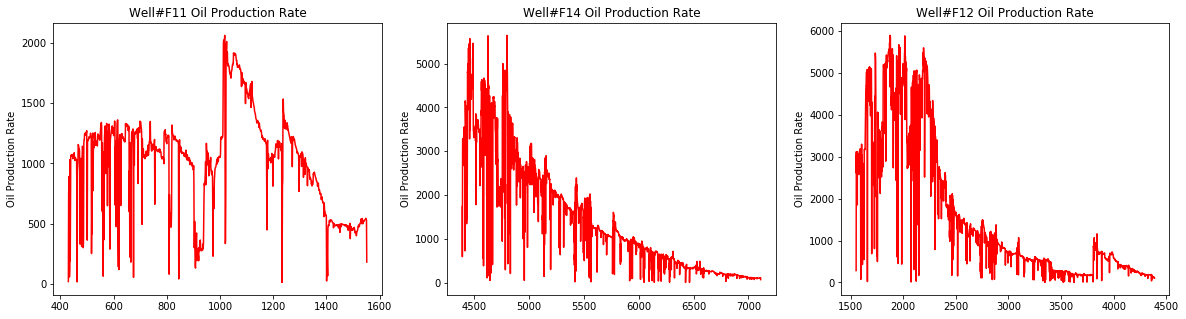

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylabel('Oil Production Rate'), plt.title('Well#F15 Oil Production Rate')
plt.plot(Well_F15.BORE_OIL_VOL, 'r')
plt.subplot(122)
plt.ylabel('Oil Production Rate'), plt.title('Well#F1 Oil Production Rate')
plt.plot(Well_F1.BORE_OIL_VOL, 'r')

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.ylabel('Oil Production Rate'), plt.title('Well#F11 Oil Production Rate')
plt.plot(Well_F11.BORE_OIL_VOL, 'r')
plt.subplot(132)
plt.ylabel('Oil Production Rate'), plt.title('Well#F14 Oil Production Rate')
plt.plot(Well_F14.BORE_OIL_VOL, 'r')
plt.subplot(133)
plt.ylabel('Oil Production Rate'), plt.title('Well#F12 Oil Production Rate')
plt.plot(Well_F12.BORE_OIL_VOL, 'r')

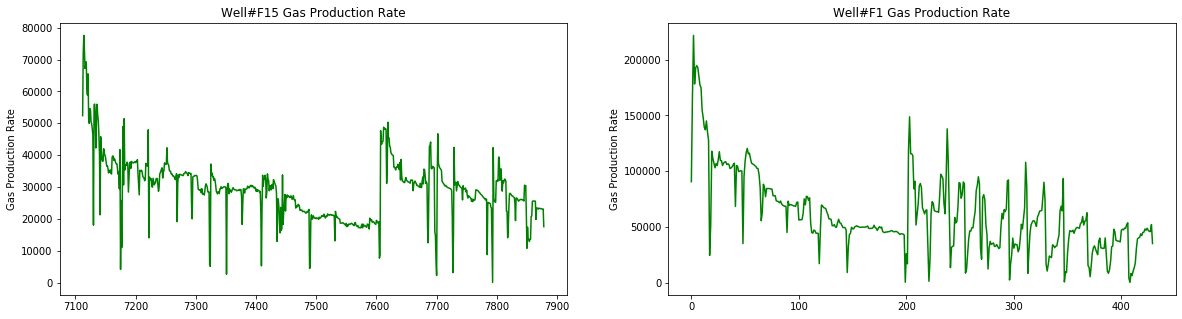

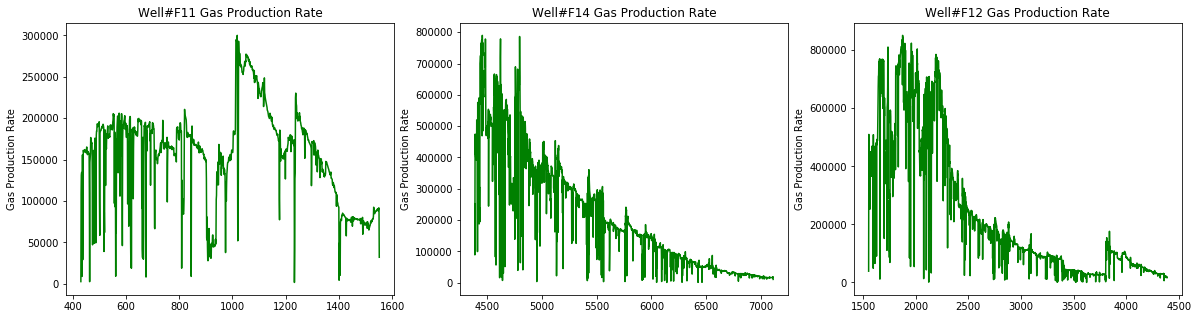

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.ylabel('Gas Production Rate'), plt.title('Well#F15 Gas Production Rate')
plt.plot(Well_F15.BORE_GAS_VOL,'g')
plt.subplot(122)
plt.ylabel('Gas Production Rate'), plt.title('Well#F1 Gas Production Rate')
plt.plot(Well_F1.BORE_GAS_VOL, 'g')

plt.figure(figsize=(20,5))
plt.subplot(131)
plt.ylabel('Gas Production Rate'), plt.title('Well#F11 Gas Production Rate')
plt.plot(Well_F11.BORE_GAS_VOL, 'g')
plt.subplot(132)
plt.ylabel('Gas Production Rate'), plt.title('Well#F14 Gas Production Rate')
plt.plot(Well_F14.BORE_GAS_VOL, 'g')
plt.subplot(133)
plt.ylabel('Gas Production Rate'), plt.title('Well#F12 Gas Production Rate')
plt.plot(Well_F12.BORE_GAS_VOL, 'g')

In [39]:
dd_df = pd.read_csv('data/cleaned_data.csv')

In [40]:
# Set up the daily data frame for use as as time series 
dd_df['DateStamp'] = dd_df['DATEPRD']
print('unique days',len(dd_df['DATEPRD'].unique()))
dd_df['DateStamp'] = pd.to_datetime(dd_df['DateStamp'])
dd_df.index = dd_df['DateStamp']

unique days 2962


In [41]:
#are there any unexpected numbers. like negative production?
badnum = dd_df[dd_df['BORE_OIL_VOL'] < 0]
badnum = pd.concat([badnum, dd_df[dd_df['BORE_GAS_VOL'] < 0]])
badnum = pd.concat([badnum, dd_df[dd_df['BORE_WAT_VOL'] < 0]])
badnum = badnum[['BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL']]
#badnum.rename(columns={"'NPD_WELL_BORE_CODE'": "Well_Bore"}, inplace=True)

badnum.rename(columns={'NPD_WELL_BORE_CODE': 'WellBore'}, inplace=True)

In [42]:
badnum

,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DateStamp,,,
2008-04-23,2735.53,422115.01,-14.19
2012-08-13,632.96,12123.37,-457.84
2009-03-03,4339.13,616094.56,-0.95
2012-08-13,202.53,3754.12,-59.19


In [43]:
dd_df['BORE_WAT_VOL'].clip(lower=0, inplace = True)

In [44]:
# We need to pivot the production data to a long df with wells as columns to make a stacked chart
prod_by_well = pd.pivot_table(dd_df,index=['DATEPRD'],values=["BORE_OIL_VOL"],columns=["NPD_WELL_BORE_NAME"])
#convert to a non-pivoted dataframe
prod_by_well = pd.DataFrame(prod_by_well.to_records())
#rename columns
prod_by_well.columns = [hdr.replace("('BORE_OIL_VOL', ", "").replace(")", "") \
                     for hdr in prod_by_well.columns]

In [45]:
#fill in nans with 0.0. We have to do this because when the data is pivoterd we add new 
# "data" without values
prod_by_well.fillna(0.0, inplace=True)

In [46]:
#How much oil was produced over the life of the field?
prod_by_well['Field_OP_Rate'] = prod_by_well.sum(axis=1)
prod_by_well['Cum_OP_Volume'] = prod_by_well['Field_OP_Rate'].cumsum()

# We need to pivot the production data to a long df with wells as columns to make a stacked chart
gas_by_well = pd.pivot_table(dd_df,index=['DATEPRD'],values=["BORE_GAS_VOL"],columns=["NPD_WELL_BORE_NAME"])

#convert to a non-pivoted dataframe
gas_by_well = pd.DataFrame(gas_by_well.to_records())
#rename columns
gas_by_well.columns = [hdr.replace("('BORE_GAS_VOL', ", "").replace(")", "") \
                     for hdr in gas_by_well.columns]
#fill in nans with 0.0. We have to do this because when the data is pivoterd we add new 
# "data" without values
gas_by_well.fillna(0.0, inplace=True)

#How much gas was produced over the life of the field?"""
gas_by_well['Field_GP_Rate'] = gas_by_well.sum(axis=1)
gas_by_well['Cum_GP_Volume'] = gas_by_well['Field_GP_Rate'].cumsum()

# We need to pivot the production data to a long df with wells as columns to make a stacked chart
wat_by_well = pd.pivot_table(dd_df,index=['DATEPRD'],values=["BORE_WAT_VOL"],columns=["NPD_WELL_BORE_NAME"])

#convert to a non-pivoted dataframe
wat_by_well = pd.DataFrame(wat_by_well.to_records())
#rename columns
wat_by_well.columns = [hdr.replace("('BORE_WAT_VOL', ", "").replace(")", "") \
                     for hdr in wat_by_well.columns]
#fill in nans with 0.0. We have to do this because when the data is pivoterd we add new 
# "data" without values
wat_by_well.fillna(0.0, inplace=True)

#How much water was produced over the life of the field?"""
wat_by_well['Field_WP_Rate'] = wat_by_well.sum(axis=1)
wat_by_well['Cum_WP_Volume'] = wat_by_well['Field_WP_Rate'].cumsum()


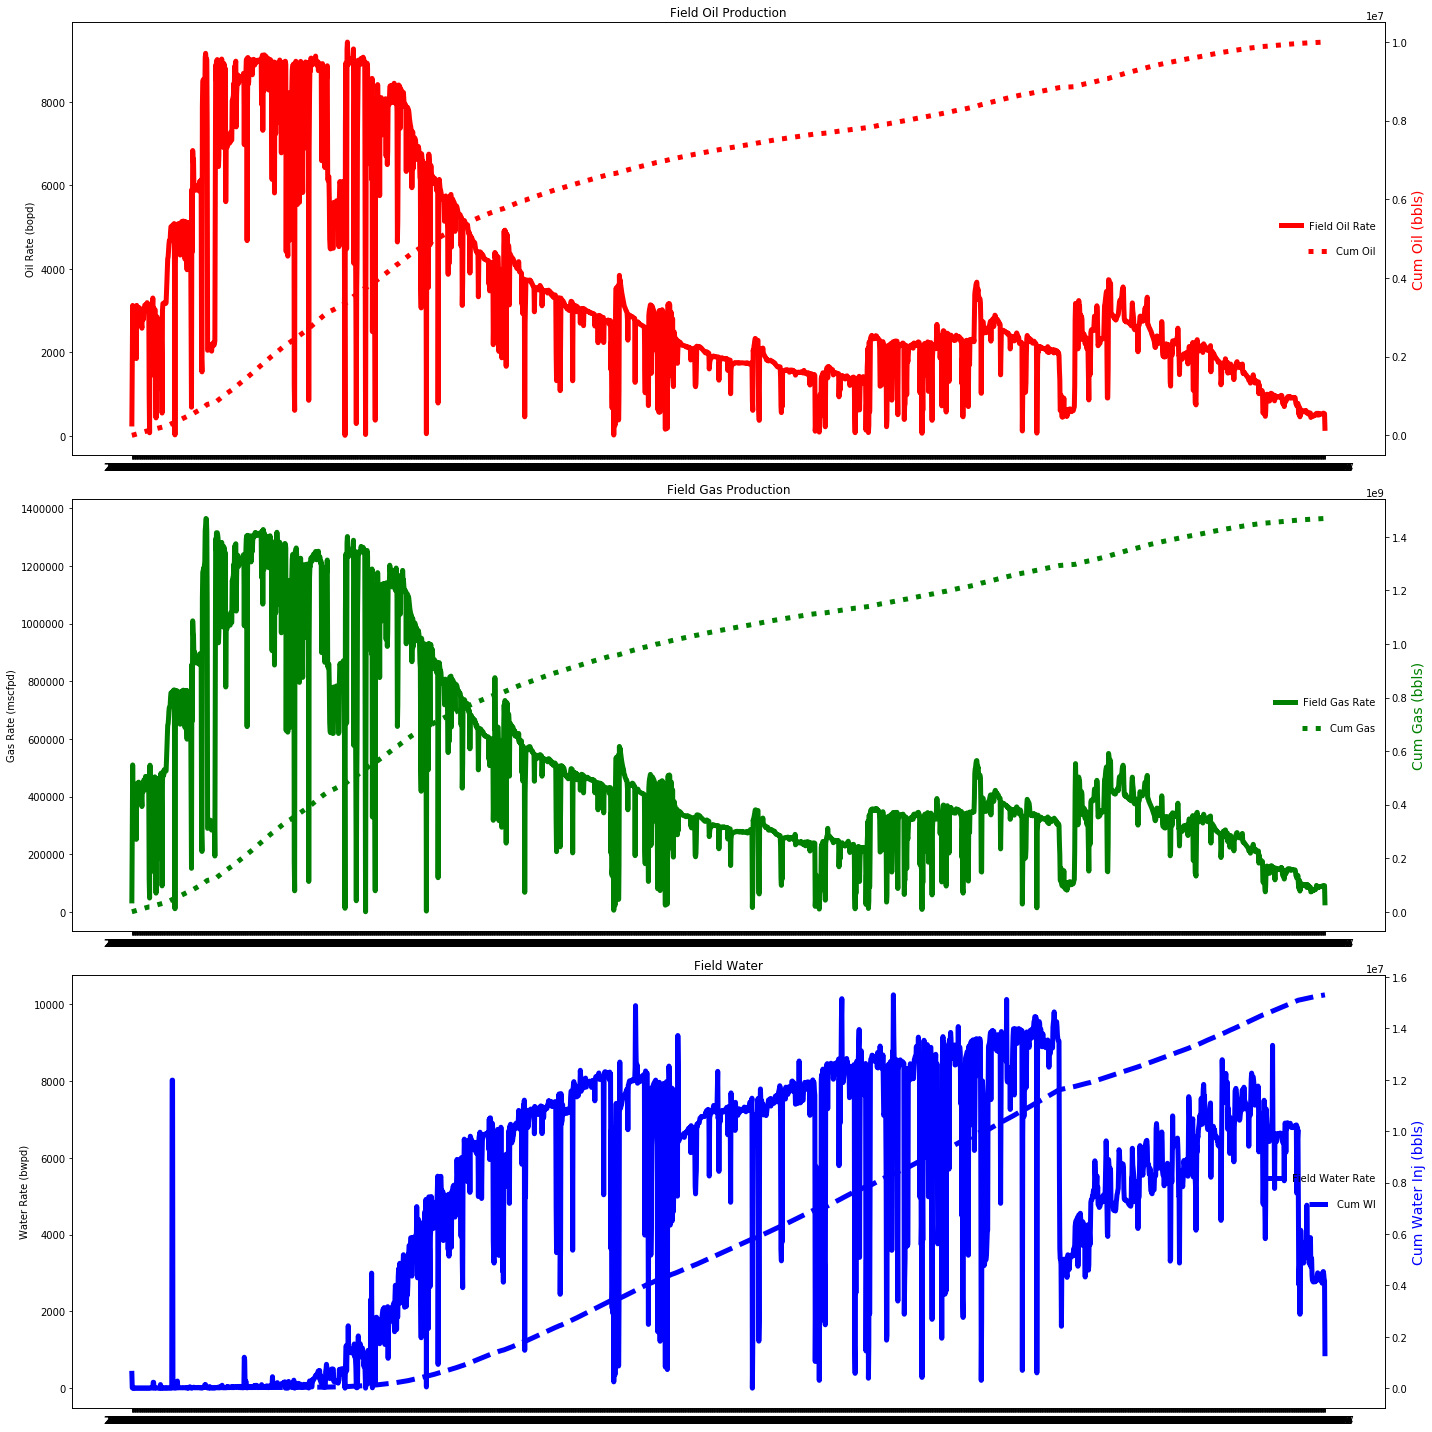

In [48]:
"""Visualizations"""
"""Field rates and Cum Volumes"""

fig, ax0 = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

'''Field Oil Production '''
x = prod_by_well['DATEPRD'].tolist()
y1 = prod_by_well['Field_OP_Rate'].tolist()
y2 = prod_by_well['Cum_OP_Volume']
ax0[0].plot(x,y1,color='red', label = 'Field Oil Rate', linewidth = 5)
ax0[0].title.set_text('Field Oil Production')
ax0[0].set_ylabel('Oil Rate (bopd)')
ax0[0].legend(bbox_to_anchor=(1.0, 0.53),loc='center right', frameon=False)

ax00 =ax0[0].twinx()
# make a plot with different y-axis using second axis object
ax00.plot(x,y2,color="red", linestyle = 'dotted',label = "Cum Oil", linewidth = 5)
ax00.set_ylabel("Cum Oil (bbls)",color="red",fontsize=14)
ax00.legend(bbox_to_anchor=(1.0, 0.47),loc='center right', frameon=False)
fig.tight_layout()


''' Field Gas Production '''
x = gas_by_well['DATEPRD'].tolist()
y1 = gas_by_well['Field_GP_Rate'].tolist()
y2 = gas_by_well['Cum_GP_Volume']
ax0[1].plot(x,y1,color='green', label = 'Field Gas Rate', linewidth = 5)
ax0[1].title.set_text('Field Gas Production')
ax0[1].set_ylabel('Gas Rate (mscfpd)')
ax0[1].legend(bbox_to_anchor=(1.0, 0.53),loc='center right', frameon=False)

ax11 =ax0[1].twinx()
# make a plot with different y-axis using second axis object
ax11.plot(x,y2,color="green", linestyle = 'dotted',label = "Cum Gas", linewidth = 5)
ax11.set_ylabel("Cum Gas (bbls)",color="green",fontsize=14)
ax11.legend(bbox_to_anchor=(1.0, 0.47),loc='center right', frameon=False)
fig.tight_layout()

''' Field Water Production ''' 
x = wat_by_well['DATEPRD'].tolist()
y1 = wat_by_well['Field_WP_Rate'].tolist()
y2 = wat_by_well['Cum_WP_Volume']
ax0[2].plot(x,y1,color='blue', label = 'Field Water Rate', linewidth = 5)
ax0[2].title.set_text('Field Water')
ax0[2].set_ylabel('Water Rate (bwpd)')
ax0[2].legend(bbox_to_anchor=(1.0, 0.53),loc='center right', frameon=False)

ax22 =ax0[2].twinx()
# make a plot with different y-axis using second axis object
ax22.plot(x,y2,color="blue", linestyle = '--',label = "Cum WI", linewidth = 5)
ax22.set_ylabel("Cum Water Inj (bbls)",color="blue",fontsize=14)
ax22.legend(bbox_to_anchor=(1.0, 0.47),loc='center right', frameon=False)
fig.tight_layout()